In [1]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [4]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [5]:
#Executar só uma vez a cada vez que abrir o colab
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

OperationalError: table ANSWERS already exists

Modelo relacional
<img src="diagrama/diagrama.png">

In [6]:
def boostreap(p,n_size = 500):
    values = np.zeros(n_size)
    
    d = pd.DataFrame(p)
    
    for i in range(n_size):
        sample = d[0].sample(replace = True,n = len(p))
        values[i] = sample.mean()
        
    return values

In [7]:
def gerarB(selecionados,df,n_size=500):
    p = []
    for country in selecionados:
        pais = df[df["COUNTRYCODE"] == country]

        for x in range(pais.shape[0]):
            sample = pais.iloc[x]
            for _ in range(int(sample["TAMANHO"])):
                p.append(sample["VALUE"])

    b = boostreap(p,n_size=n_size)
    
    return b

# Questão 2: Existe uma relação entre o aumento do IDH do país e a maior sensação de segurança?

In [8]:
query = """
Select COUNTRYCODE,SUBSET,PERCENTAGE,VALOR,HDI,VALUE
From PESOS NATURAL JOIN ANSWERS NATURAL JOIN SIZE NATURAL JOIN IDH
WHERE SUBSET == TIPO

"""

df = pd.read_sql_query(query,conn)
df["TAMANHO"] = df["PERCENTAGE"] * df["VALOR"] * 0.01
df

,COUNTRYCODE,SUBSET,PERCENTAGE,VALOR,HDI,VALUE,TAMANHO
0,0,LESBIAN,33,437,885.0,0.0,144.21
1,0,LESBIAN,53,437,885.0,1.0,231.61
2,0,LESBIAN,2,437,885.0,0.5,8.74
3,0,GAY,51,1558,885.0,0.0,794.58
4,0,GAY,25,1558,885.0,1.0,389.50
...,...,...,...,...,...,...,...
4703,11,BIM,65,294,907.0,0.0,191.10
4704,11,BIM,3,294,907.0,0.5,8.82
4705,11,TRANS,31,813,907.0,1.0,252.03
4706,11,TRANS,65,813,907.0,0.0,528.45


In [9]:
indx = list(df.groupby("COUNTRYCODE").mean().sort_values("HDI").index)
meio = int(len(indx)/2)

maus = indx[:meio]
bons = indx[meio:]

In [10]:
bonsB = gerarB(bons,df)
mausB = gerarB(maus,df)

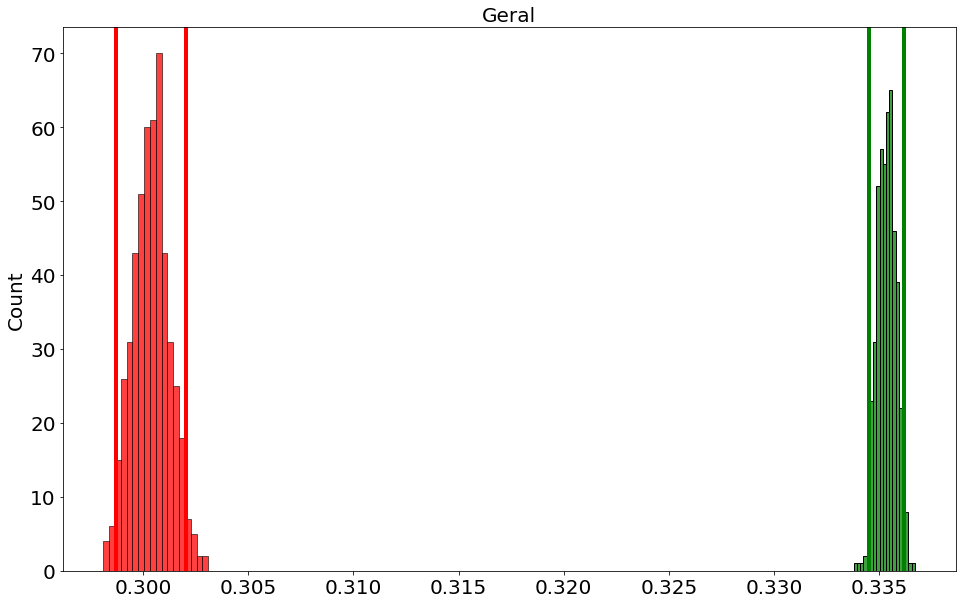

In [11]:
sns.histplot(bonsB,color="g")
inf = np.percentile(bonsB,2.5)
sup = np.percentile(bonsB,97.5)
plt.axvline(inf,color="g")
plt.axvline(sup,color="g")

sns.histplot(mausB,color="r")
inf = np.percentile(mausB,2.5)
sup = np.percentile(mausB,97.5)
plt.axvline(inf,color="r")
plt.axvline(sup,color="r")

plt.title("Geral")

plt.show()


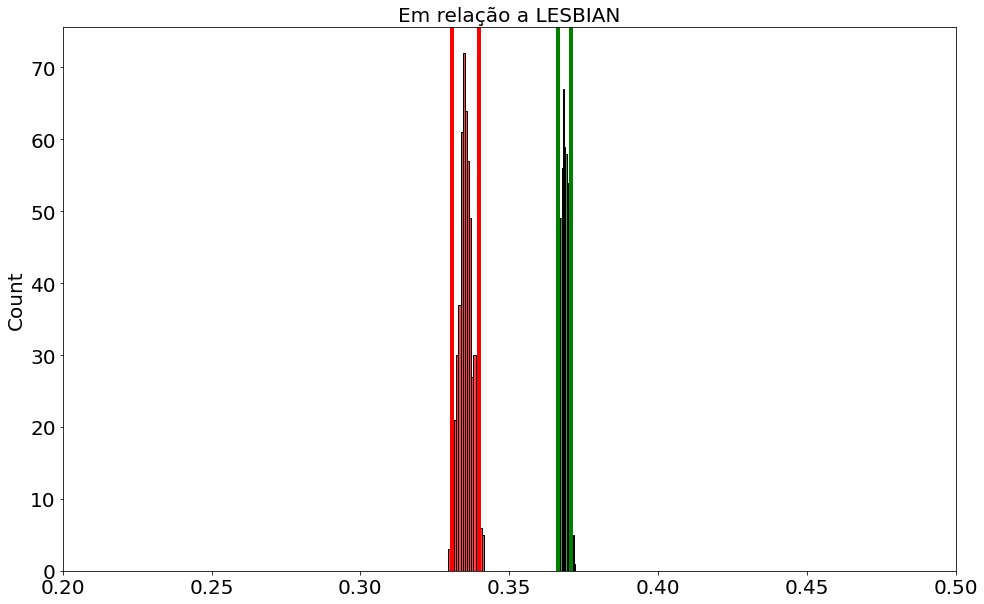

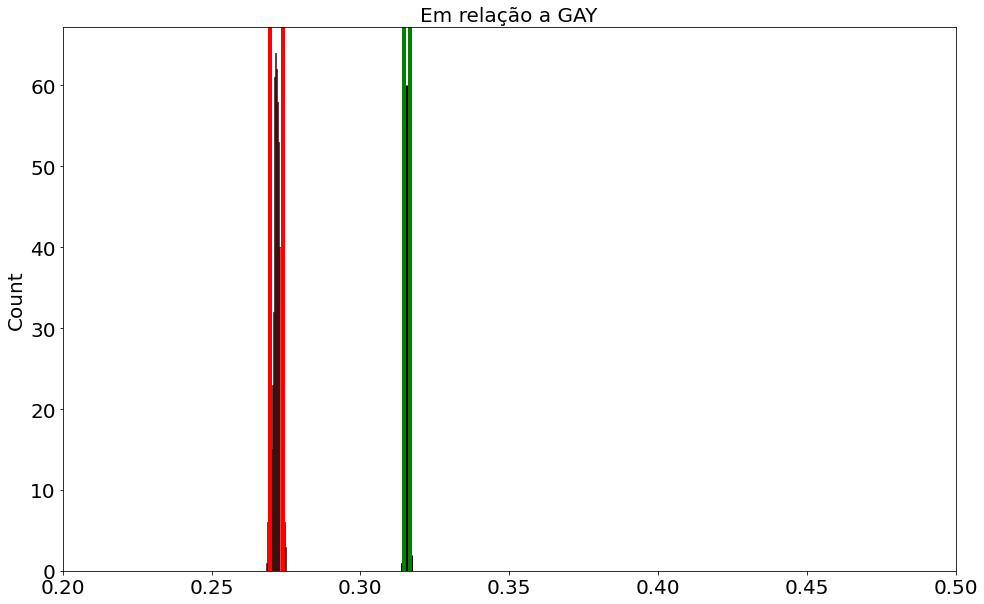

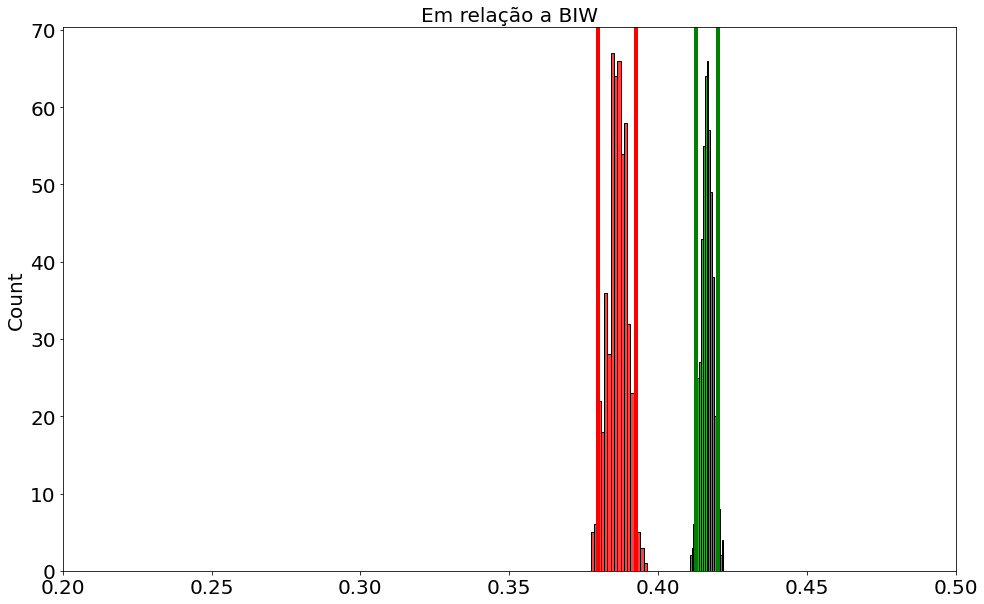

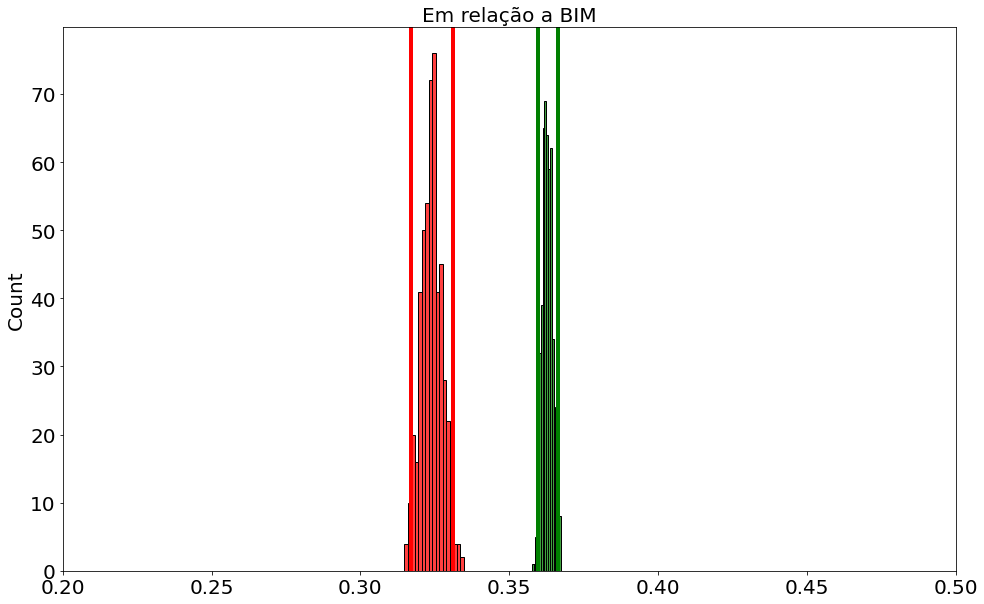

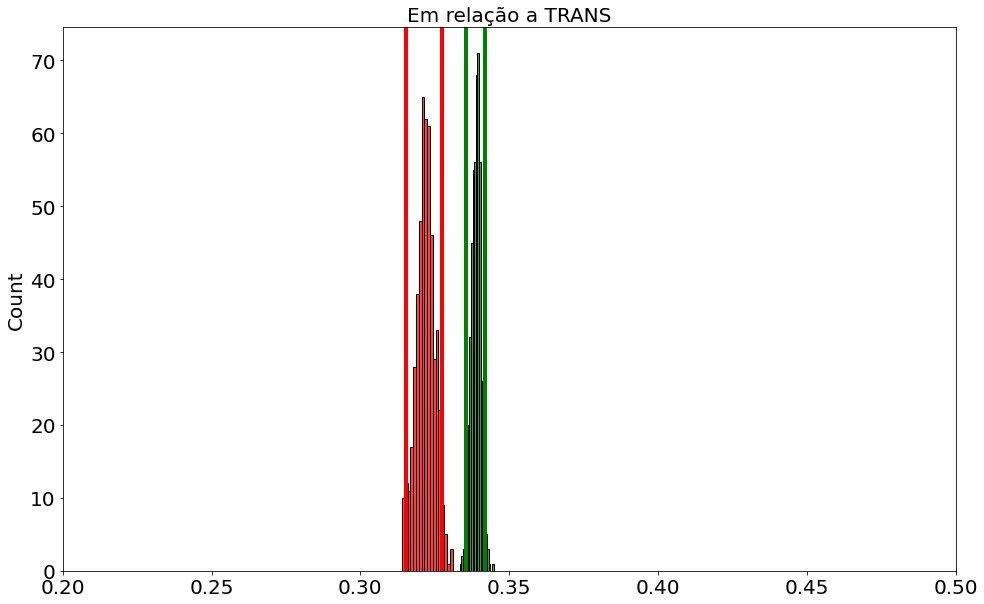

In [12]:
for x in df["SUBSET"].unique():
    df2 = df[df["SUBSET"] == x]
    
    bonsB = gerarB(bons,df2)
    mausB = gerarB(maus,df2)
    
    sns.histplot(bonsB,color="g")
    inf = np.percentile(bonsB,2.5)
    sup = np.percentile(bonsB,97.5)
    plt.axvline(inf,color="g")
    plt.axvline(sup,color="g")

    sns.histplot(mausB,color="r")
    inf = np.percentile(mausB,2.5)
    sup = np.percentile(mausB,97.5)
    plt.axvline(inf,color="r")
    plt.axvline(sup,color="r")
    
    plt.xlim(0.2,0.5)
    
    plt.title("Em relação a {}".format(x))

    plt.show()

### Analise em relação a coorelação linear

In [13]:
pontos = []
for x in df["COUNTRYCODE"].unique():
    pais = df[df["COUNTRYCODE"] == x]
    
    idh = pais["HDI"].values[0]
    
    a = gerarB([x],df)
    
    for i in a:
        pontos.append([idh,i])
        
pontos

[[885.0, 0.3319656790763295],
 [885.0, 0.33180731910972905],
 [885.0, 0.330713195704126],
 [885.0, 0.3334916932999338],
 [885.0, 0.3286833088595203],
 [885.0, 0.33419711496933574],
 [885.0, 0.33258472258213123],
 [885.0, 0.3329590279577323],
 [885.0, 0.327517203650917],
 [885.0, 0.32865451613832025],
 [885.0, 0.3295758832167228],
 [885.0, 0.33303100976073247],
 [885.0, 0.33002217039532405],
 [885.0, 0.3351328784083384],
 [885.0, 0.3317209409461288],
 [885.0, 0.33462900578733695],
 [885.0, 0.3371771616135441],
 [885.0, 0.33241196625493075],
 [885.0, 0.3334916932999338],
 [885.0, 0.3321096426823299],
 [885.0, 0.33483055483573754],
 [885.0, 0.332498344418531],
 [885.0, 0.3303388903285249],
 [885.0, 0.33591028188074057],
 [885.0, 0.3329590279577323],
 [885.0, 0.33223920992773026],
 [885.0, 0.3297486395439233],
 [885.0, 0.3330022170395324],
 [885.0, 0.3323687771731306],
 [885.0, 0.3323543808125306],
 [885.0, 0.33244075897613085],
 [885.0, 0.3330022170395324],
 [885.0, 0.329287956004722],
 [

In [14]:
pontos = np.array(pontos)
pontosDf = pd.DataFrame(pontos)

for x in pontosDf.columns:
    pontosDf[x] = pontosDf[x] - pontosDf[x].mean()
    
    pontosDf[x] = pontosDf[x] / pontosDf[x].std()

pontosDf

,0,1
0,0.511934,0.373399
1,0.511934,0.368417
2,0.511934,0.333997
3,0.511934,0.421406
4,0.511934,0.270139
...,...,...
13995,1.094838,0.183882
13996,1.094838,0.221724
13997,1.094838,0.275542
13998,1.094838,0.240728


In [15]:
X = [[i] for i in pontosDf[0].values]
y = pontosDf[1].values


model = LinearRegression()
model.fit(X,y)


linha = [[-3],[3]]
y_pred = model.predict(linha)

model.coef_

array([0.64231208])

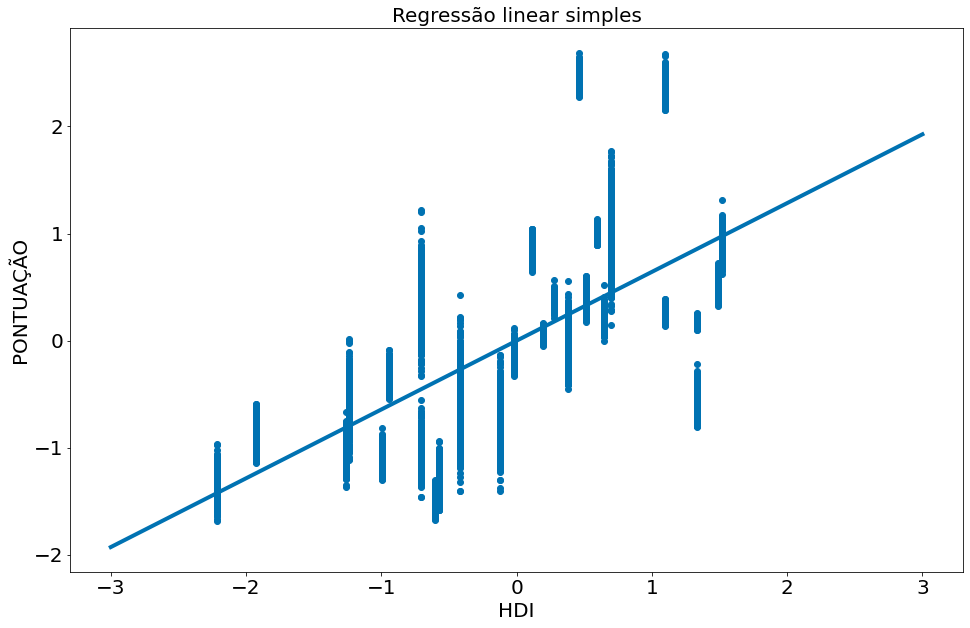

In [16]:
plt.scatter(pontosDf[0],pontosDf[1])
plt.plot(linha,y_pred)
plt.ylabel('PONTUAÇÃO')
plt.xlabel('HDI')
plt.title('Regressão linear simples')
plt.show()

# Questão 5: Usando uma arvore de decisão para prever a pontuação

## Formatando os dados

In [17]:
query = """
Select *
From RELIGION NATURAL JOIN CULTURE NATURAL JOIN IDH

"""

df = pd.read_sql_query(query,conn)
df

,COUNTRYCODE,Catholic,Orthodox,Protestant,OtherChristian,TotalChristians,NonBeliever,Atheist,Muslim,pdi,...,mas,uai,ltowvs,ivr,HDI,LEB,EYS,MYS,GNI,GNI_HDI
0,21,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,...,14.0,53.0,67.0,68,922.0,81.6,17.9,11.9,45.435,9.0
1,4,27.1,0.2,1.0,3.2,31.5,38.6,25.8,0.0,57.0,...,57.0,74.0,70.0,29,870.0,78.6,16.4,12.3,26.660,10.0
2,25,1.6,0.9,36.5,8.6,47.6,31.0,19.0,1.2,31.0,...,5.0,29.0,53.0,78,907.0,82.2,15.8,12.1,45.636,-1.0
3,14,60.3,1.1,5.1,8.1,74.6,18.5,2.7,0.3,46.0,...,88.0,82.0,58.0,31,828.0,75.2,15.4,11.6,22.916,3.0
4,10,47.8,0.6,1.8,4.1,54.3,17.6,22.8,3.3,68.0,...,43.0,86.0,63.0,48,888.0,82.2,16.0,11.1,38.056,4.0
5,19,26.2,24.0,16.6,9.9,76.7,17.3,4.7,1.2,44.0,...,9.0,63.0,69.0,13,819.0,74.2,15.2,11.5,22.281,4.0
6,1,52.9,1.6,2.1,4.1,60.7,17.1,14.9,5.2,65.0,...,54.0,94.0,82.0,57,890.0,80.8,16.3,11.3,41.187,0.0
7,8,64.2,1.4,0.8,2.2,68.6,17.0,10.9,0.6,57.0,...,42.0,86.0,48.0,44,876.0,82.6,17.3,9.6,32.045,7.0
8,7,2.8,23.2,9.0,23.6,58.6,16.6,22.2,0.2,40.0,...,30.0,60.0,82.0,16,861.0,76.8,16.5,12.5,25.214,12.0
9,0,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,11.0,...,79.0,70.0,60.0,63,885.0,81.4,15.7,10.8,43.869,-5.0


In [18]:
query = """
Select *
From Answers

"""

pegar = pd.read_sql_query(query,conn)
country = pegar["COUNTRYCODE"].unique()
subset = pegar["SUBSET"].unique()
pegar

,COUNTRYCODE,SUBSET,QC,ANSWER,PERCENTAGE,NOTES
0,0,LESBIAN,b1_a,Very widespread,8,NULL
1,0,LESBIAN,b1_a,Fairly widespread,34,NULL
2,0,LESBIAN,b1_a,Fairly rare,45,NULL
3,0,LESBIAN,b1_a,Very rare,9,NULL
4,0,LESBIAN,b1_a,Don`t know,4,[0]
...,...,...,...,...,...,...
88190,11,TRANS,fb2_9,Lesbian,1,[0]
88191,11,TRANS,fb2_9,Gay,3,[0]
88192,11,TRANS,fb2_9,Bisexual,1,[0]
88193,11,TRANS,fb2_9,Mixed sexual orientation,3,NULL


In [19]:
query = """
Select COUNTRYCODE,SUBSET,PERCENTAGE,VALOR,HDI,VALUE
From PESOS NATURAL JOIN ANSWERS NATURAL JOIN SIZE NATURAL JOIN IDH
WHERE SUBSET == TIPO

"""
y_values = pd.read_sql_query(query,conn)
y_values["TAMANHO"] = y_values["PERCENTAGE"] * y_values["VALOR"] * 0.01
y_values

,COUNTRYCODE,SUBSET,PERCENTAGE,VALOR,HDI,VALUE,TAMANHO
0,0,LESBIAN,33,437,885.0,0.0,144.21
1,0,LESBIAN,53,437,885.0,1.0,231.61
2,0,LESBIAN,2,437,885.0,0.5,8.74
3,0,GAY,51,1558,885.0,0.0,794.58
4,0,GAY,25,1558,885.0,1.0,389.50
...,...,...,...,...,...,...,...
4703,11,BIM,65,294,907.0,0.0,191.10
4704,11,BIM,3,294,907.0,0.5,8.82
4705,11,TRANS,31,813,907.0,1.0,252.03
4706,11,TRANS,65,813,907.0,0.0,528.45


In [20]:
query = """
Select *
From Size

"""
quantidade = pd.read_sql_query(query,conn)
quantidade

,COUNTRYCODE,TIPO,VALOR
0,0,LESBIAN,437
1,0,GAY,1558
2,0,BIW,164
3,0,BIM,217
4,0,TRANS,167
...,...,...,...
135,13,LESBIAN,235
136,13,GAY,592
137,13,BIW,157
138,13,BIM,105


In [21]:
bots = pd.DataFrame(columns=["COUNTRYCODE","SUBSET","VALUE"])

for count in country:
    for sub in subset:
        sample = y_values[y_values["SUBSET"] == sub]
        sample = sample[sample["COUNTRYCODE"] == count]

        if len(sample) == 0:
            continue

        valor = quantidade[quantidade["COUNTRYCODE"] == count]
        valor = valor[valor["TIPO"] == sub]
        valor = valor["VALOR"].values[0]




        b = gerarB([count],sample,n_size=5).mean()


        bots = bots.append({"COUNTRYCODE": count, "SUBSET" : sub, "VALUE": b},ignore_index=True)
bots

In [22]:
df = df.merge(bots)
df = df.fillna(0)
df

,COUNTRYCODE,Catholic,Orthodox,Protestant,OtherChristian,TotalChristians,NonBeliever,Atheist,Muslim,pdi,...,ltowvs,ivr,HDI,LEB,EYS,MYS,GNI,GNI_HDI,SUBSET,VALUE
0,21,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,...,67.0,68,922.0,81.6,17.9,11.9,45.435,9.0,LESBIAN,0.384989
1,21,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,...,67.0,68,922.0,81.6,17.9,11.9,45.435,9.0,GAY,0.307677
2,21,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,...,67.0,68,922.0,81.6,17.9,11.9,45.435,9.0,BIW,0.435057
3,21,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,...,67.0,68,922.0,81.6,17.9,11.9,45.435,9.0,BIM,0.371496
4,21,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,...,67.0,68,922.0,81.6,17.9,11.9,45.435,9.0,TRANS,0.367293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,24,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,...,52.0,20,793.0,74.7,14.2,10.8,18.108,10.0,LESBIAN,0.313010
126,24,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,...,52.0,20,793.0,74.7,14.2,10.8,18.108,10.0,GAY,0.260132
127,24,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,...,52.0,20,793.0,74.7,14.2,10.8,18.108,10.0,BIW,0.352288
128,24,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,...,52.0,20,793.0,74.7,14.2,10.8,18.108,10.0,BIM,0.349766


In [83]:
df_final = df.drop("COUNTRYCODE",1)

dumie = pd.get_dummies(df_final[["SUBSET"]])

df_final = df_final.drop("SUBSET",1)

for i in dumie.columns:
    df_final[i] = dumie[i]

df_final

,Catholic,Orthodox,Protestant,OtherChristian,TotalChristians,NonBeliever,Atheist,Muslim,pdi,idv,...,EYS,MYS,GNI,GNI_HDI,VALUE,SUBSET_BIM,SUBSET_BIW,SUBSET_GAY,SUBSET_LESBIAN,SUBSET_TRANS
0,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,80.0,...,17.9,11.9,45.435,9.0,0.384989,0,0,0,1,0
1,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,80.0,...,17.9,11.9,45.435,9.0,0.307677,0,0,1,0,0
2,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,80.0,...,17.9,11.9,45.435,9.0,0.435057,0,1,0,0,0
3,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,80.0,...,17.9,11.9,45.435,9.0,0.371496,1,0,0,0,0
4,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,38.0,80.0,...,17.9,11.9,45.435,9.0,0.367293,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,30.0,...,14.2,10.8,18.108,10.0,0.313010,0,0,0,1,0
126,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,30.0,...,14.2,10.8,18.108,10.0,0.260132,0,0,1,0,0
127,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,30.0,...,14.2,10.8,18.108,10.0,0.352288,0,1,0,0,0
128,5.3,89.9,3.4,1.0,99.6,0.2,0.1,0.1,90.0,30.0,...,14.2,10.8,18.108,10.0,0.349766,1,0,0,0,0


## Fazendo a regresão

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import dtreeviz 
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [85]:
X = df_final.drop("VALUE",1)
y = df_final["VALUE"]

In [86]:
X,X_test,y,y_test = train_test_split(X,y)

In [91]:
para = range(1,20,1)
parameters = {"criterion": ["mse", "friedman_mse", "mae", "poisson"],
             "max_depth": para}
svs = DecisionTreeRegressor()
cv = KFold(n_splits=5)
clf = GridSearchCV(svs,parameters,cv = cv)

In [92]:
clf.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(1, 20)})

In [93]:
clf.score(X_test,y_test)

0.25438944963397536

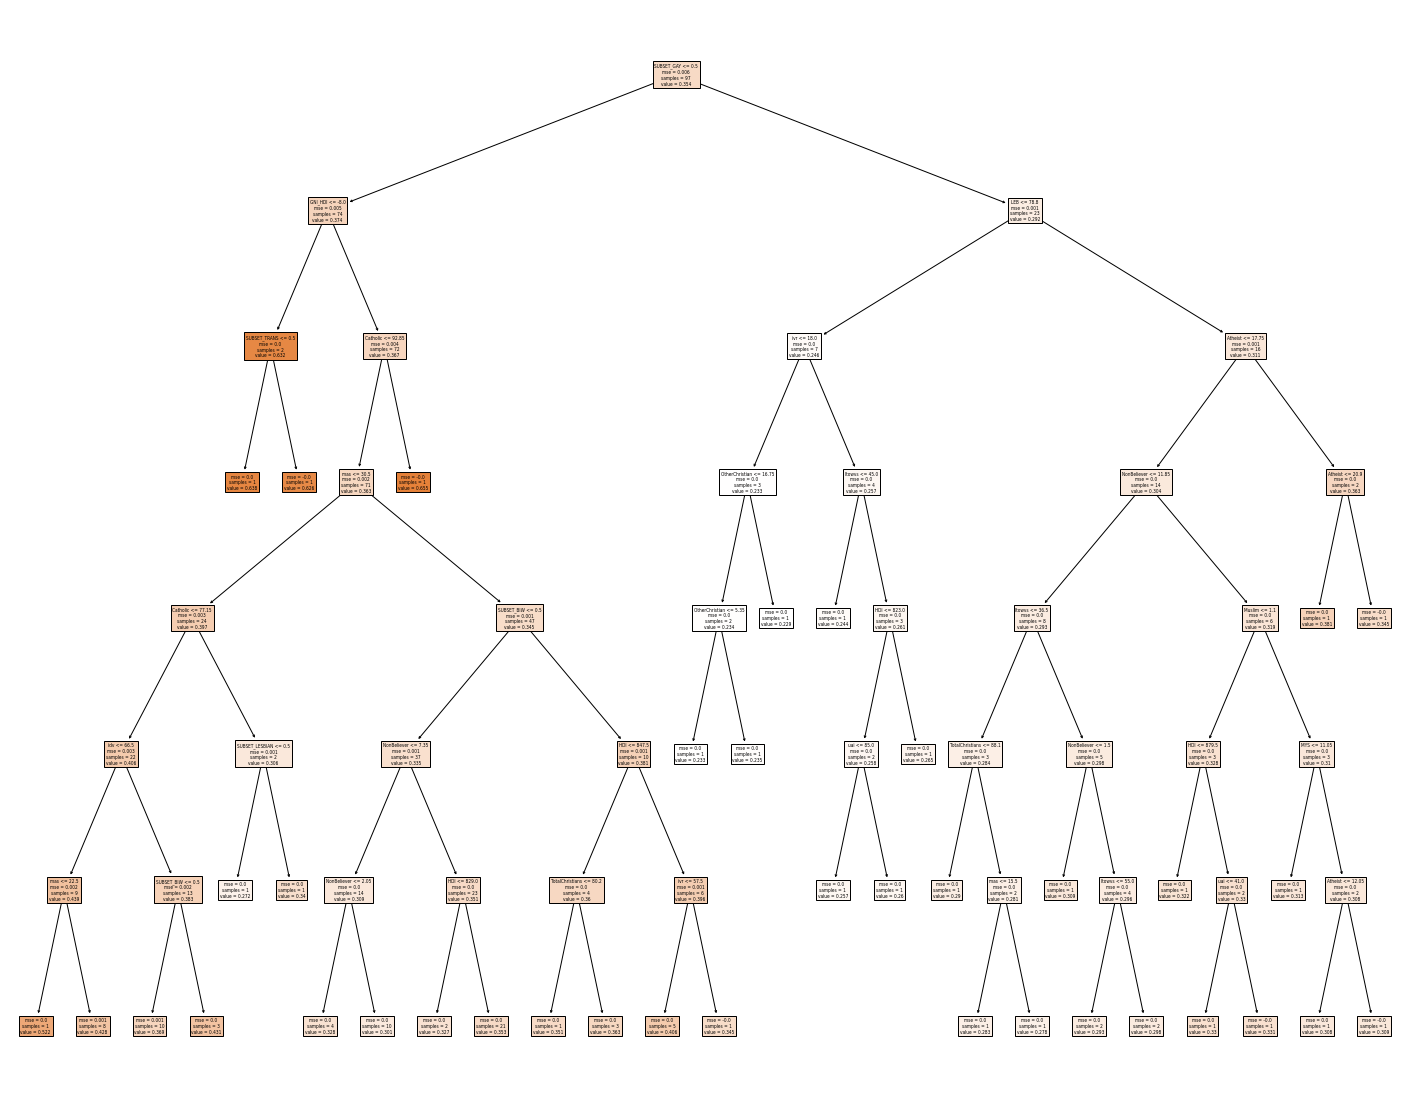

In [94]:
ig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.best_estimator_, 
                   feature_names= X.columns,  
                   filled=True)